# Importing libraries

In [12]:
from cmath import pi as pi
from math import sin as sin
from math import cos as cos
import matplotlib.pyplot as plt
import numpy as np

# FWT functions

In [13]:
#Fast
def _direct_fast_walsh_transorm(inner, _sums=0, _muls=0):
    length = len(inner)

    if length == 1:
        return inner, _sums, _muls

    left, right = [], []

    for i in range(int(length / 2)):
        left.append(inner[i] + inner[i + int(length / 2)])
        right.append(inner[i] - inner[i + int(length / 2)])
        _sums += 2

    left, _sums, _muls = _direct_fast_walsh_transorm(left, _sums, _muls)
    right, _sums, _muls = _direct_fast_walsh_transorm(right, _sums, _muls)

    result = [None] * length
    for i in range(int(length / 2)):
        result[i] = left[i] / 2
        result[i + int(length / 2)] = right[i] / 2

    return result, _sums, _muls

def reverse_fast_walsh_transform(inner):
    length = len(inner)
    sums, muls = 0, 0

    if length == 1:
        return inner, sums, muls

    left, right = [], []

    for i in range(int(length / 2)):
        left.append(inner[i] + inner[i + int(length / 2)])
        right.append(inner[i] - inner[i + int(length / 2)])
        sums += 2

    left, sums, muls = reverse_fast_walsh_transform(left)
    right, sums, muls = reverse_fast_walsh_transform(right)

    result = [None] * length
    for i in range(int(length / 2)):
        result[i] = left[i]
        result[i + int(length / 2)] = right[i]

    return result, sums, muls

def direct_fast_walsh_transorm(inner):
    a = _direct_fast_walsh_transorm(inner)
    array = a[0]

    array[5], array[2] = array[2], array[5]
    array[6], array[3] = array[3], array[6]
    array[7], array[4] = array[4], array[7]
    array[6], array[4] = array[4], array[6]

    return array, a[1], a[2]

# DWT functions

In [14]:
#Discrete
_FUNC = [
    [+1, +1, +1, +1, +1, +1, +1, +1], #0
    [+1, -1, -1, +1, +1, -1, -1, +1], #4
    [+1, -1, +1, -1, -1, +1, -1, +1], #6
    [+1, +1, -1, -1, -1, -1, +1, +1], #2
    [+1, +1, -1, -1, +1, +1, -1, -1], #3
    [+1, -1, +1, -1, +1, -1, +1, -1], #7
    [+1, -1, -1, +1, -1, +1, +1, -1], #5
    [+1, +1, +1, +1, -1, -1, -1, -1], #1
]

def direct_discrete_walsh_transorm(inner):
    length = len(inner)

    result = []
    sums, muls = 0, 0

    for k in range(length):
        sum = .0
        for i in range(length):
            sum += inner[i] * _FUNC[k][i]
            sums += 1; muls += 1
        result.append(sum / length)

    return result, sums, muls

def reverse_discrete_walsh_transform(inner):
    length = len(inner)

    result = []
    sums, muls = 0, 0

    for k in range(length):
        sum = .0
        for i in range(length):
            sum += inner[i] * _FUNC[k][i]
            sums +=1; muls += 1
        result.append(sum)

    return result, sums, muls

# Initializing&Source plot

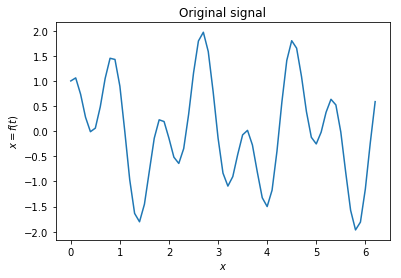

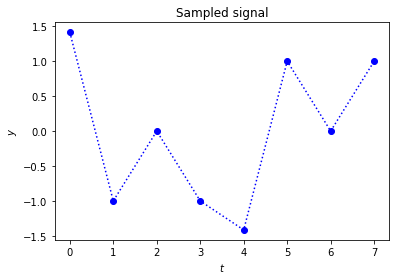

In [23]:
N = 8
x_func = lambda t: sin(3 * t) + cos(7 * t)

def sampled(func, n, period=(2 * pi)):
    out = []
    for i in range(n):
        out.append(round(func(period * (i + 1) / n), 5))
    return out

x = sampled(x_func, N)

x_range = np.arange(0, 2 * pi, 0.1)
y_range = np.sin(3 * x_range) + np.cos(7 * x_range)

plt.plot(x_range, y_range)
plt.title('Original signal')
plt.xlabel(r'$x$')
plt.ylabel(r'$x = f(t)$')
plt.show()
plt.close()

plt.plot(np.arange(N), x, "b:o")
plt.title('Sampled signal')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.show()
plt.close()

# DWT plots

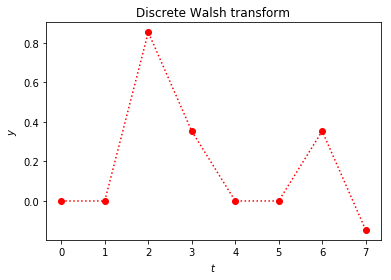

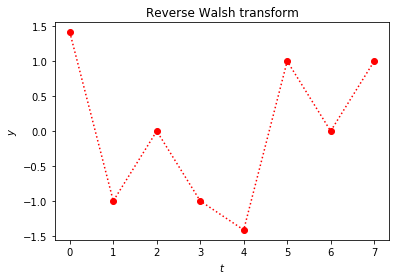

In [24]:
#Discrete
walshed_dicrete = direct_discrete_walsh_transorm(x)
plt.plot(np.arange(N), walshed_dicrete[0], "r:o")
plt.title('Discrete Walsh transform')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.show()
plt.close()

rev_walshed = reverse_discrete_walsh_transform(walshed_dicrete[0])
plt.plot(np.arange(N), rev_walshed[0], "r:o")
plt.title('Reverse Walsh transform')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.show()
plt.close()

# FWT plots

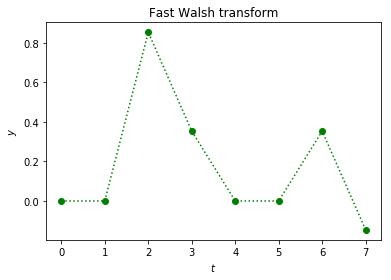

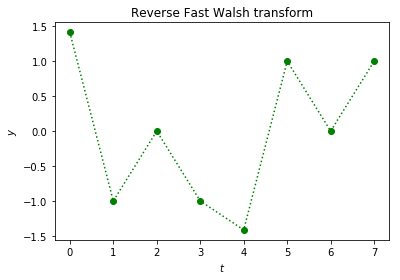

In [25]:
#Fast
walshed_fast = direct_fast_walsh_transorm(x)
plt.plot(np.arange(N), walshed_fast[0], "g:o")
plt.title('Fast Walsh transform')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.show()
plt.close()

rev_walshed = reverse_discrete_walsh_transform(walshed_fast[0])
plt.plot(np.arange(N), rev_walshed[0], "g:o")
plt.title('Reverse Fast Walsh transform')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.show()
plt.close()